In [1]:
!pip install seaborn


In [2]:
#-------------------------------------- Librerías ---------------------------------------------

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
#-----------------------------------------------------------------------------------------
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
datos = pd.read_csv('heart.csv') #lee el archivo .csv
nRow, nCol = datos.shape
print(f'Hay {nRow} filas and {nCol} columnas')

Hay 303 filas and 14 columnas


In [4]:
datos

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
NewColums= ['Edad', 'Sexo', 'TD-pecho', 'PAR', 'COLS', 'ASA', 'Electro_r', 'FC_Max', 'Angina_Ex' , 'oldpeak', 'ST_exerpico', 'Flora', 'thal', 'target'] 
# TD-Pecho: tipo de dolor en el pecho (4valores),
#PAR:presión arterial en reposo
#COLS: colesterol sérico en mg / dl
#ASA: azúcar en sangre en ayunas> 120 mg / dl
# Electro_r: resultados electrocardiográficos en reposo (valores 0,1,2)
#FC_Max: frecuencia cardíaca máxima alcanzada
# Angina_Ex: angina inducida por ejercicio
#oldpeak = depresión del ST inducida por el ejercicio en relación con el reposo
# ST_exerpico: la pendiente del segmento ST de ejercicio pico
# Flora: número de vasos principales (0-3) coloreados por la floración
# thal: 3 = normal; 6 = defecto fijo; 7 = defecto reversible
# target---- Variable obbjetivo

In [6]:
datos.columns=NewColums
datos

,Edad,Sexo,TD-pecho,PAR,COLS,ASA,Electro_r,FC_Max,Angina_Ex,oldpeak,ST_exerpico,Flora,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
datos.info() # Me da información sobre la filas y las columdas el DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Edad         303 non-null    int64  
 1   Sexo         303 non-null    int64  
 2   TD-pecho     303 non-null    int64  
 3   PAR          303 non-null    int64  
 4   COLS         303 non-null    int64  
 5   ASA          303 non-null    int64  
 6   Electro_r    303 non-null    int64  
 7   FC_Max       303 non-null    int64  
 8   Angina_Ex    303 non-null    int64  
 9   oldpeak      303 non-null    float64
 10  ST_exerpico  303 non-null    int64  
 11  Flora        303 non-null    int64  
 12  thal         303 non-null    int64  
 13  target       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
datos.describe() # Describe los datos que se tienen


,Edad,Sexo,TD-pecho,PAR,COLS,ASA,Electro_r,FC_Max,Angina_Ex,oldpeak,ST_exerpico,Flora,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
datos = datos.drop_duplicates()
datos.isna().sum() # Comprueba los valores perdidos

Edad           0
Sexo           0
TD-pecho       0
PAR            0
COLS           0
ASA            0
Electro_r      0
FC_Max         0
Angina_Ex      0
oldpeak        0
ST_exerpico    0
Flora          0
thal           0
target         0
dtype: int64

In [10]:
EC = ['yes' if i == 1 else 'no' for i in datos['target']]
datos['Enfermedad_Corazon'] = np.array(EC)

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
datos

,Edad,Sexo,TD-pecho,PAR,COLS,ASA,Electro_r,FC_Max,Angina_Ex,oldpeak,ST_exerpico,Flora,thal,target,Enfermedad_Corazon
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,no
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,no
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,no
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,no


In [12]:
EC2 = ['yes' if i == 1 else 'no' for i in datos['Sexo']]
datos['Conteo'] = np.array(EC2)
datos

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Edad,Sexo,TD-pecho,PAR,COLS,ASA,Electro_r,FC_Max,Angina_Ex,oldpeak,ST_exerpico,Flora,thal,target,Enfermedad_Corazon,Conteo
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,yes,yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,yes,yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,yes,no
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,yes,yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,no,no
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,no,yes
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,no,yes
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,no,yes


## análisis de Datos

In [13]:
datos_copy = datos.copy() # Realiza una copia de los datos
X = datos_copy.iloc[:,0:13]  # Columna Independiente
y = datos_copy.iloc[:,-1]  # Columna target o variable objetivo
#--------------------------------------------------------------------------------------------------------------

# SelectKBest: técnica en la que elegimos las características de nuestros datos que más contribuyen 
# a la variable de destino. En otras palabras, elegimos los mejores predictores para la variable objetivo.
k=10 # Por defecto se toma k=10 en SelectKBest
datos_caract = SelectKBest(score_func=chi2, k=k)
fit = datos_caract.fit(X,y) 
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([data_columns,data_scores],axis=1)
featureScores.columns = ['Especificaciones','Puntaje']  #Nombra las columnas
pd.DataFrame(featureScores.nsmallest(13,'Puntaje')) #Imprime los 10 mejores features

,Especificaciones,Puntaje
10,ST_exerpico,0.089036
5,ASA,0.544337
6,Electro_r,0.576175
2,TD-pecho,0.890679
12,thal,2.185133
7,FC_Max,2.276604
3,PAR,2.344614
9,oldpeak,3.763264
0,Edad,4.083290
8,Angina_Ex,4.177904


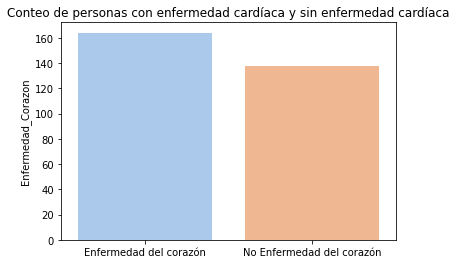

In [14]:
sns.set_palette("pastel") # Se define la paleta de tonalidades
sns.barplot(x=['Enfermedad del corazón', 'No Enfermedad del corazón'], y=datos['Enfermedad_Corazon'].value_counts())
plt.title('Conteo de personas con enfermedad cardíaca y sin enfermedad cardíaca')
plt.savefig('Conteo.pdf')
plt.show()

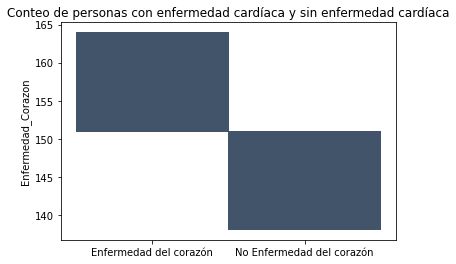

In [15]:
sns.histplot(x=['Enfermedad del corazón', 'No Enfermedad del corazón'], y=datos['Enfermedad_Corazon'].value_counts());
plt.title('Conteo de personas con enfermedad cardíaca y sin enfermedad cardíaca');
plt.show()

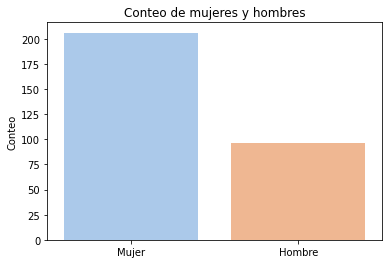

In [16]:
sns.set_palette("pastel") # Se define la paleta de tonalidades
sns.barplot(x=['Mujer', 'Hombre'], y=datos['Conteo'].value_counts())
plt.title('Conteo de mujeres y hombres')
plt.savefig('ConteoMJ.pdf')
plt.show()

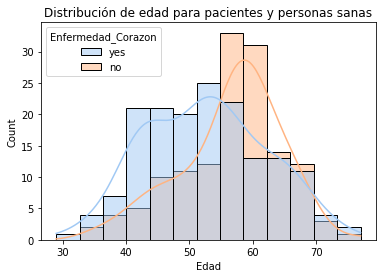

In [17]:
#-------------------- Gráfica de la distribucción de edadd para pacientes y personas sanas-----------------------------

sns.histplot(data=datos, x='Edad', hue='Enfermedad_Corazon' , kde=True)
plt.title('Distribución de edad para pacientes y personas sanas')
plt.savefig('Distribuccion.pdf')
plt.show()

**feature_importances_**:  puede obtener la importancia de cada característica de su conjunto de datos utilizando la propiedad Características del modelo. El valor de la característica le da una puntuación para cada función de sus resultados; cuanto más alta sea la puntuación, más significativa o apropiada será la variable de rendimiento. La importancia de la característica es la clase incorporada que viene con los clasificadores basados en árboles 

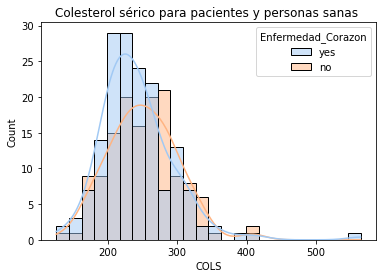

In [18]:
#--------------------- Gráfica de colesterol sérico Vs para pacientes y personas sanas   
sns.color_palette()
sns.histplot(data=datos, x='COLS', hue='Enfermedad_Corazon', kde=True)
plt.title('Colesterol sérico para pacientes y personas sanas ')
plt.savefig('colesterol.pdf')
plt.show()

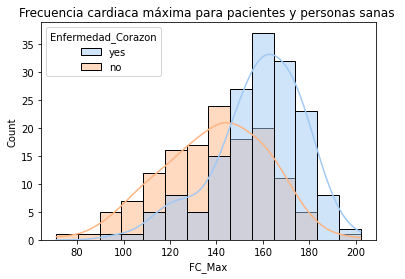

In [19]:
#--------------------- Gráfica de colesterol sérico Vs para pacientes y personas sanas   

sns.color_palette("Set2")
sns.histplot(data=datos, x='FC_Max', hue='Enfermedad_Corazon', kde=True)
plt.title('Frecuencia cardiaca máxima para pacientes y personas sanas ')
plt.savefig('FrecuenciaMax.pdf')
plt.show()

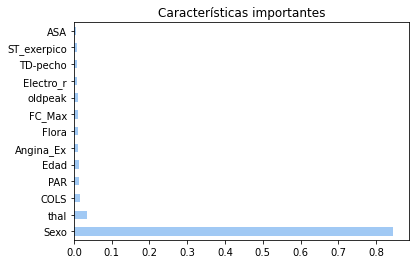

In [20]:
Modelo = ExtraTreesClassifier()
Modelo.fit(X,y)
feat_importances = pd.Series(Modelo.feature_importances_, index=X.columns)
# .feature_importances: clasificadores basados en árboles ---- calcula la importancia relativa de las características.
feat_importances.nlargest(13).plot(kind='barh') # trazar el gráfico de las características importantes.
plt.title('Características importantes')
plt.savefig('features_importance.pdf')
plt.show()

In [22]:
datos_copy = datos.copy() # Realiza una copia de los datos
def Fun_Sexo(sexo):
    if sexo == 0:
        return 'Mujer'
    else:
        return 'Hombre'
datos_copy['Sexo'] = datos_copy['Sexo'].apply(Fun_Sexo)

In [23]:
def Fun_paciente(Enfermedad_co):
    if Enfermedad_co == 0:
        return 'Con enfermedad cardíaca'
    else:
        return 'Sin enfermedad cardíaca'
datos_copy['target'] = datos_copy['target'].apply(Fun_paciente)

In [24]:
datos_copy

,Edad,Sexo,TD-pecho,PAR,COLS,ASA,Electro_r,FC_Max,Angina_Ex,oldpeak,ST_exerpico,Flora,thal,target,Enfermedad_Corazon,Conteo
0,63,Hombre,3,145,233,1,0,150,0,2.3,0,0,1,Sin enfermedad cardíaca,yes,yes
1,37,Hombre,2,130,250,0,1,187,0,3.5,0,0,2,Sin enfermedad cardíaca,yes,yes
2,41,Mujer,1,130,204,0,0,172,0,1.4,2,0,2,Sin enfermedad cardíaca,yes,no
3,56,Hombre,1,120,236,0,1,178,0,0.8,2,0,2,Sin enfermedad cardíaca,yes,yes
4,57,Mujer,0,120,354,0,1,163,1,0.6,2,0,2,Sin enfermedad cardíaca,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Mujer,0,140,241,0,1,123,1,0.2,1,0,3,Con enfermedad cardíaca,no,no
299,45,Hombre,3,110,264,0,1,132,0,1.2,1,0,3,Con enfermedad cardíaca,no,yes
300,68,Hombre,0,144,193,1,1,141,0,3.4,1,2,3,Con enfermedad cardíaca,no,yes
301,57,Hombre,0,130,131,0,1,115,1,1.2,1,1,3,Con enfermedad cardíaca,no,yes


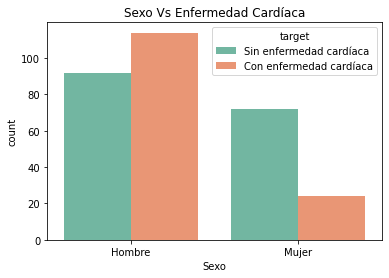

In [25]:
sns.countplot(data= datos_copy, x='Sexo',hue='target',  palette="Set2")
plt.title('Sexo Vs Enfermedad Cardíaca')
plt.savefig('analisismujerhombre.pdf')
plt.show()

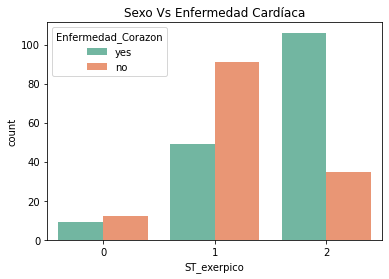